# Module 20 - Waves on a String

## Goals

- Wave equation in 1D
- Waves on a string with damping
- Waves on a catenary

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

## One-dimensional wave equation

The one-dimensional wave equation can be written as

\begin{equation}
    \frac{\partial^2 y (x,t)}{\partial t^2} = c^2 \frac{\partial^2 y (x,t)}{\partial x^2},
\end{equation}

where $y (x,t)$ is the amplitude of oscillation relative to some reference value at a point in time $t$ and position $x$, and $c$ is the wave velocity in the $x$ direction. For a wave on a string, the velocity, $c = \sqrt{\frac{T}{\mu}}$, is determined by the tension, $T$, applied on the string, and the mass per unit length, $\mu$.

We can solve this differential equation numerically by using the method of finite differences, $y (x,t) = y (i\Delta x, n\Delta t) = y (i, n)$. First, we use a Taylor series to expand both sides of the differential equation around $t \pm \Delta t$ and $x \pm \Delta x$ and keeping up to second order terms to obtain central difference equations for each second derivative:

\begin{equation}
    \frac{\partial^2 y(x,t)}{\partial t^2} = \frac{y(x, t + \Delta t) + y(x, t - \Delta t) - 2 y(x,t)}{(\Delta t)^2}
\end{equation}

\begin{equation}
    c^2 \frac{\partial^2 y(x,t)}{\partial x^2} = c^2 \frac{y(x + \Delta x, t) + y(x - \Delta x, t) - 2 y(x,t)}{(\Delta x)^2}.
\end{equation}

Putting all this together in index form we get

\begin{equation}
    y(i, n+1) = 2 \left[ 1 - r^2 \right] y(i,n) - y(i, n-1) + r^2 \left[ y(i+1, n) + y(i-1, n) \right] ,
\end{equation}

where $r=c\frac{\Delta t}{\Delta x}$.
The last two ingredients we need to solve this equation numerically are a choice of boundary conditions at the edges of the string and an initial configuration. Fixed boundary conditions are the easiest to implement as we set $y(0,0) = y(x_{\text{max}}, 0) = 0$ and never update those positions. To find the solution at each new time step, $n+1$, we need to know the solution at two previous time steps, $n$ and $n-1$, so we assume that our first two time points have the same configuration, $y(i,0) = y(i,1)$, and begin our iterative method starting at $y(i,2)$.

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a code that solves the 1-dimensional wave equation using the finite difference equation shown above for an initial set of conditions. We need to discretize both time and space, so it will be helpful to create a 2-dimensional array that will store the string displacement, $y(i,n)$ for every position, $i$, and time,$n$. A simple initial condition ($n=0,1$) is a a "Gaussian pluck" centered at $x_0 = L/4$, where the shape of the string is determined by $y(x, 0) = exp\left[-k(x-x_0)^2\right]$, $L$ is the length of the string and $k$ is a constant that determines the width of the pluck. Set the first two time iterations equal to each other , $y[i,1] = y[i,0]$, to jumpstart the numerical method. Solve the equation using $\Delta x = \Delta t = 0.001$, $c=1$, $L=1$, $k=1000$, and 2000 time iterations.
</div>

<IPython.core.display.Javascript object>


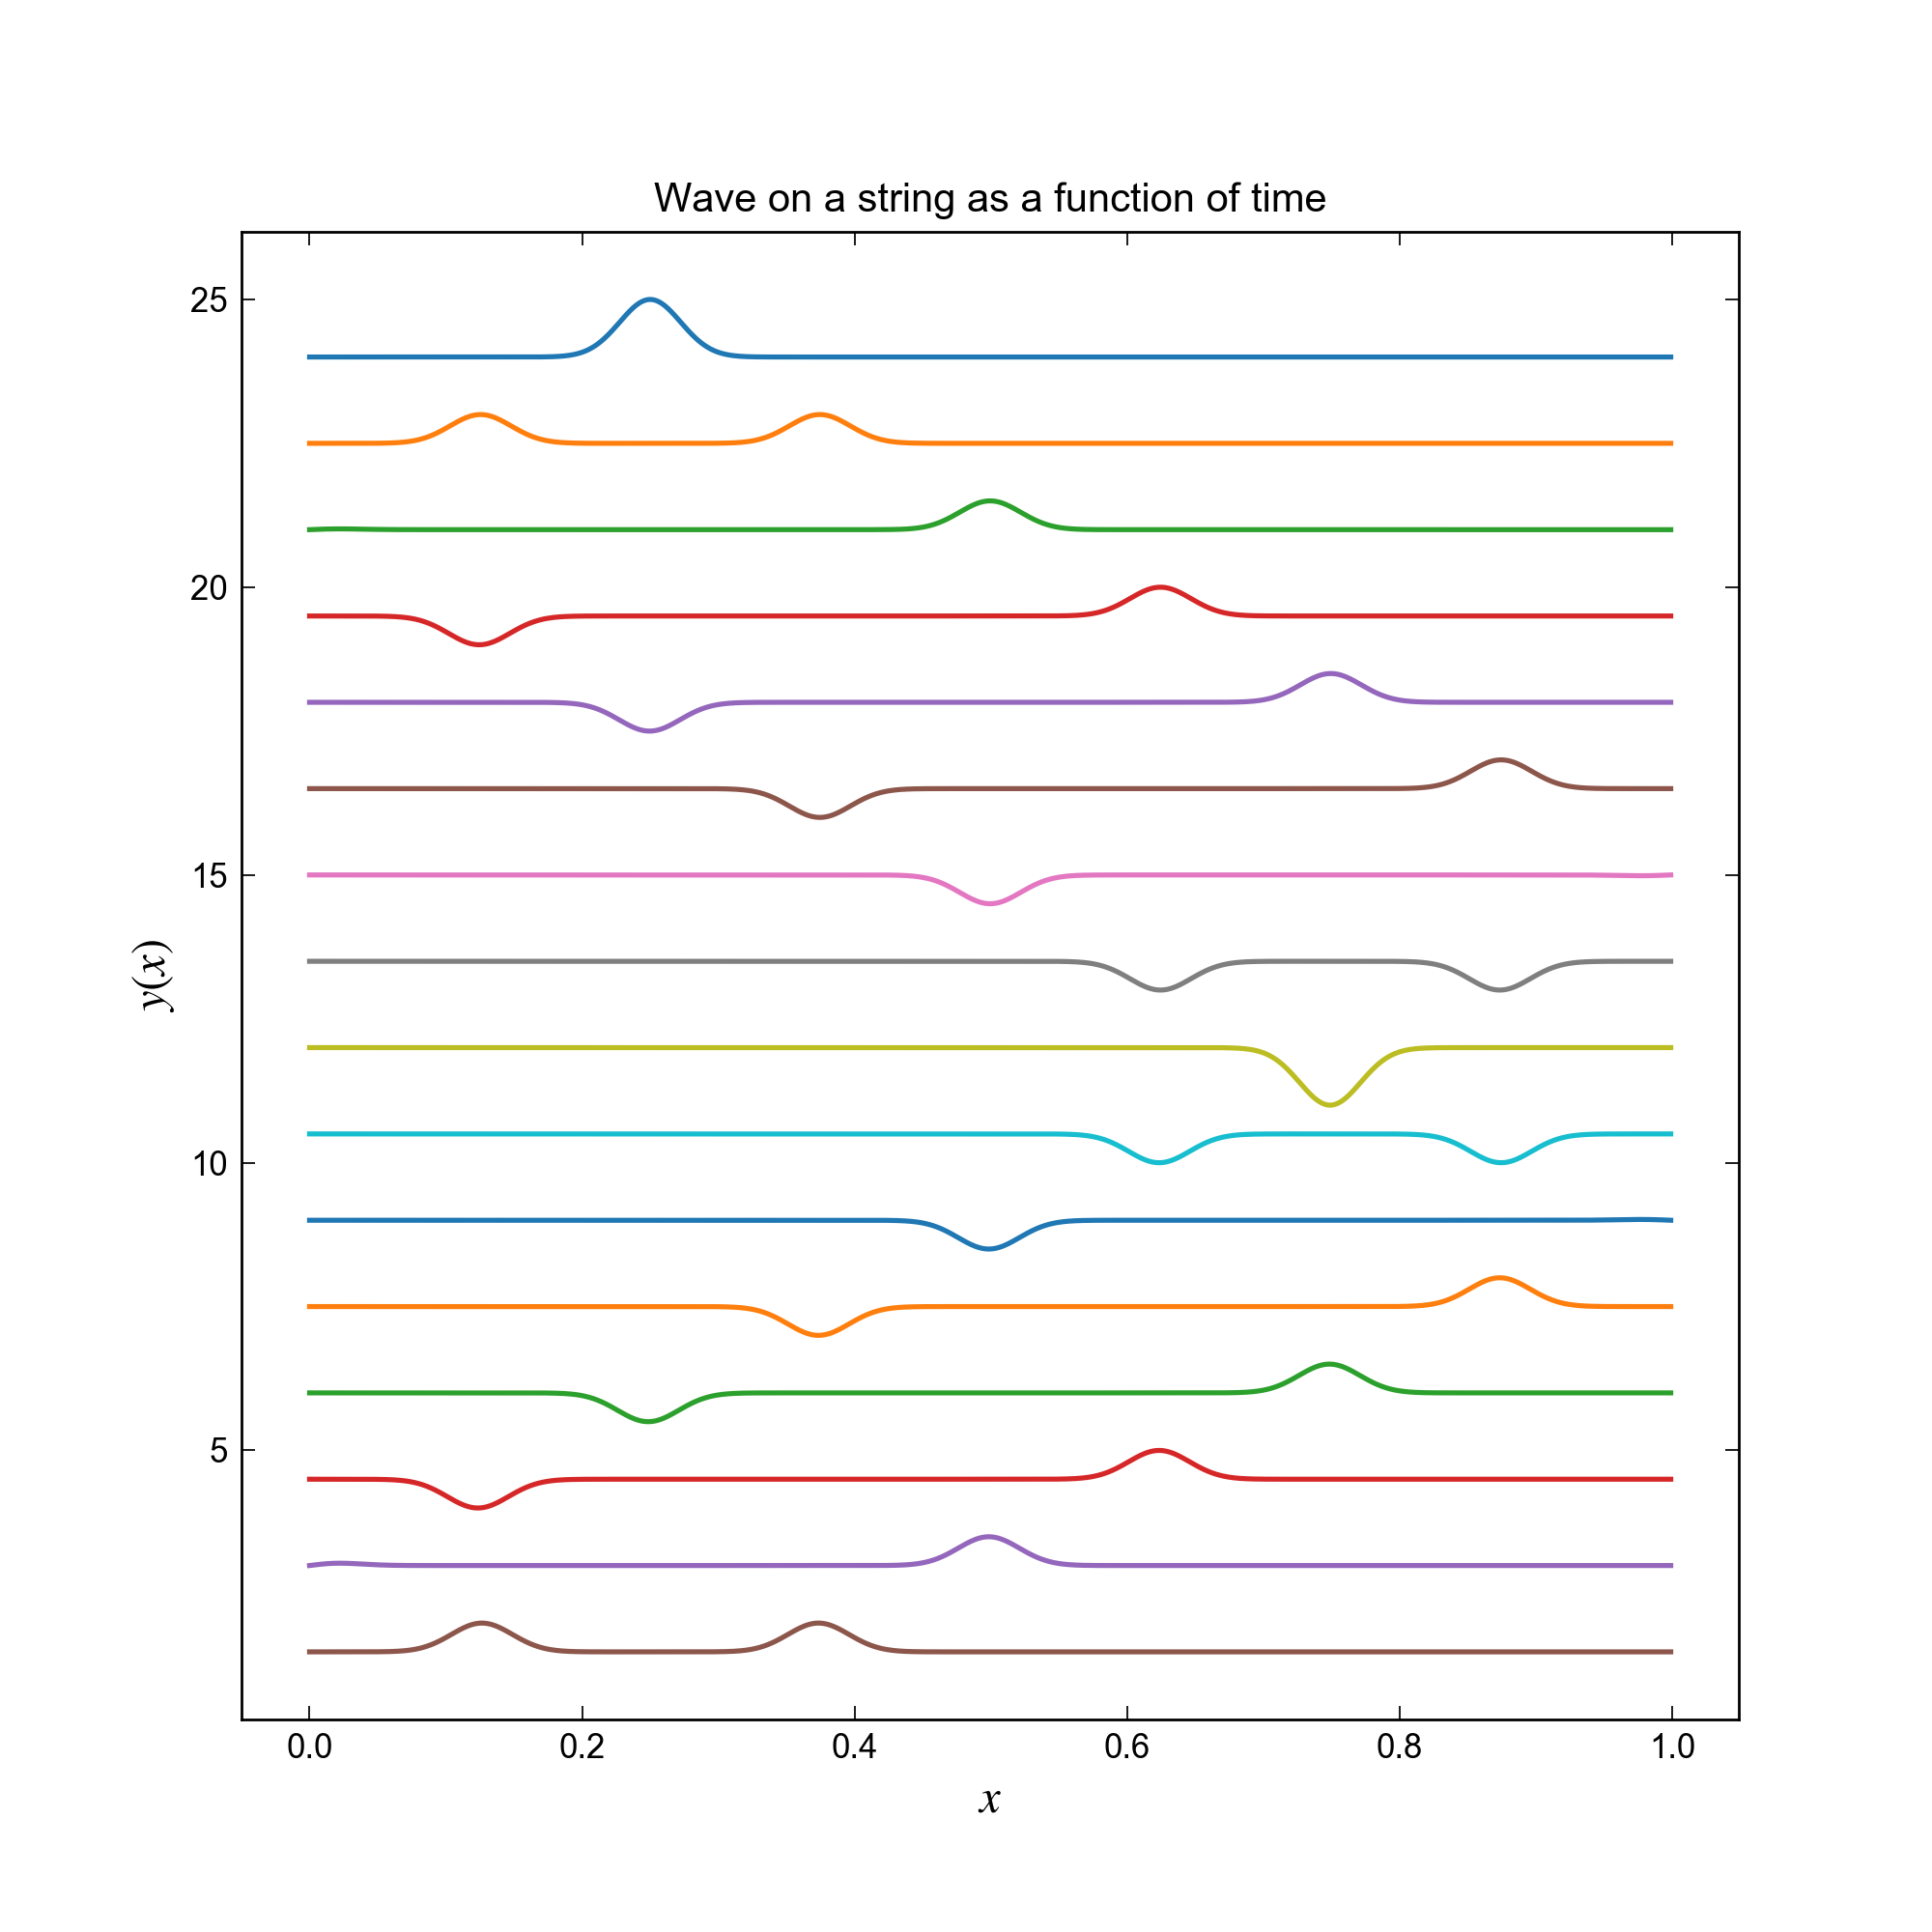

In [2]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.001
dt = 0.001

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 2000         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

y[:,0] = np.exp(-1000*(x - L/4.0)**2)
y[:,1] = np.exp(-1000*(x - L/4.0)**2)
    
for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = 2*(1 - r*r)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n])
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string as a function of time')

## Let's animate this bad boy!

<IPython.core.display.Javascript object>


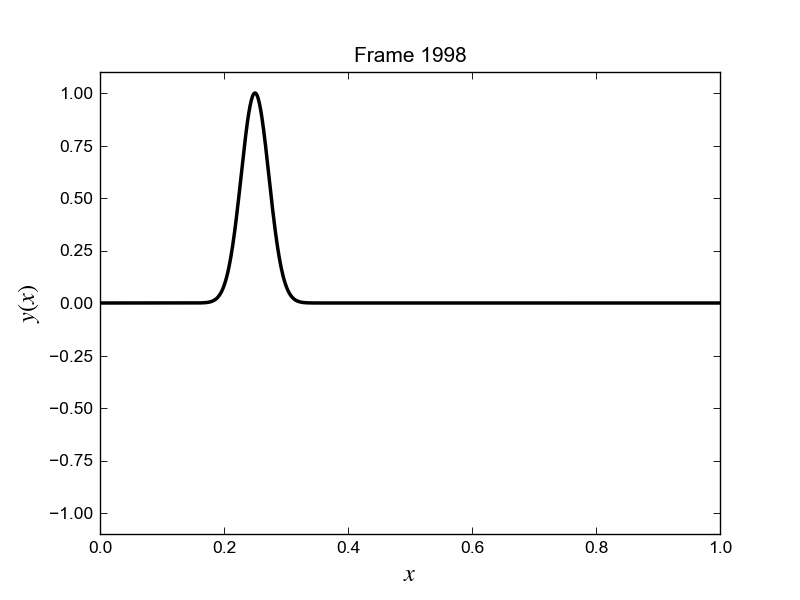

In [3]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(-1.1, 1.1))

# create a line object that will be animated
line = ax.plot(x, y[:, 0], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i])
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=2, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()

## Stability of the solution and dependence on $r = c\frac{\Delta t}{\Delta x}$
<div class="span alert alert-success">
<h2>Programming challenge </h2>
Increase the magnitude of the time interval, $\Delta t$, to 0.001005 and run for 205 time steps. What happens to the solution?
</div>

<IPython.core.display.Javascript object>


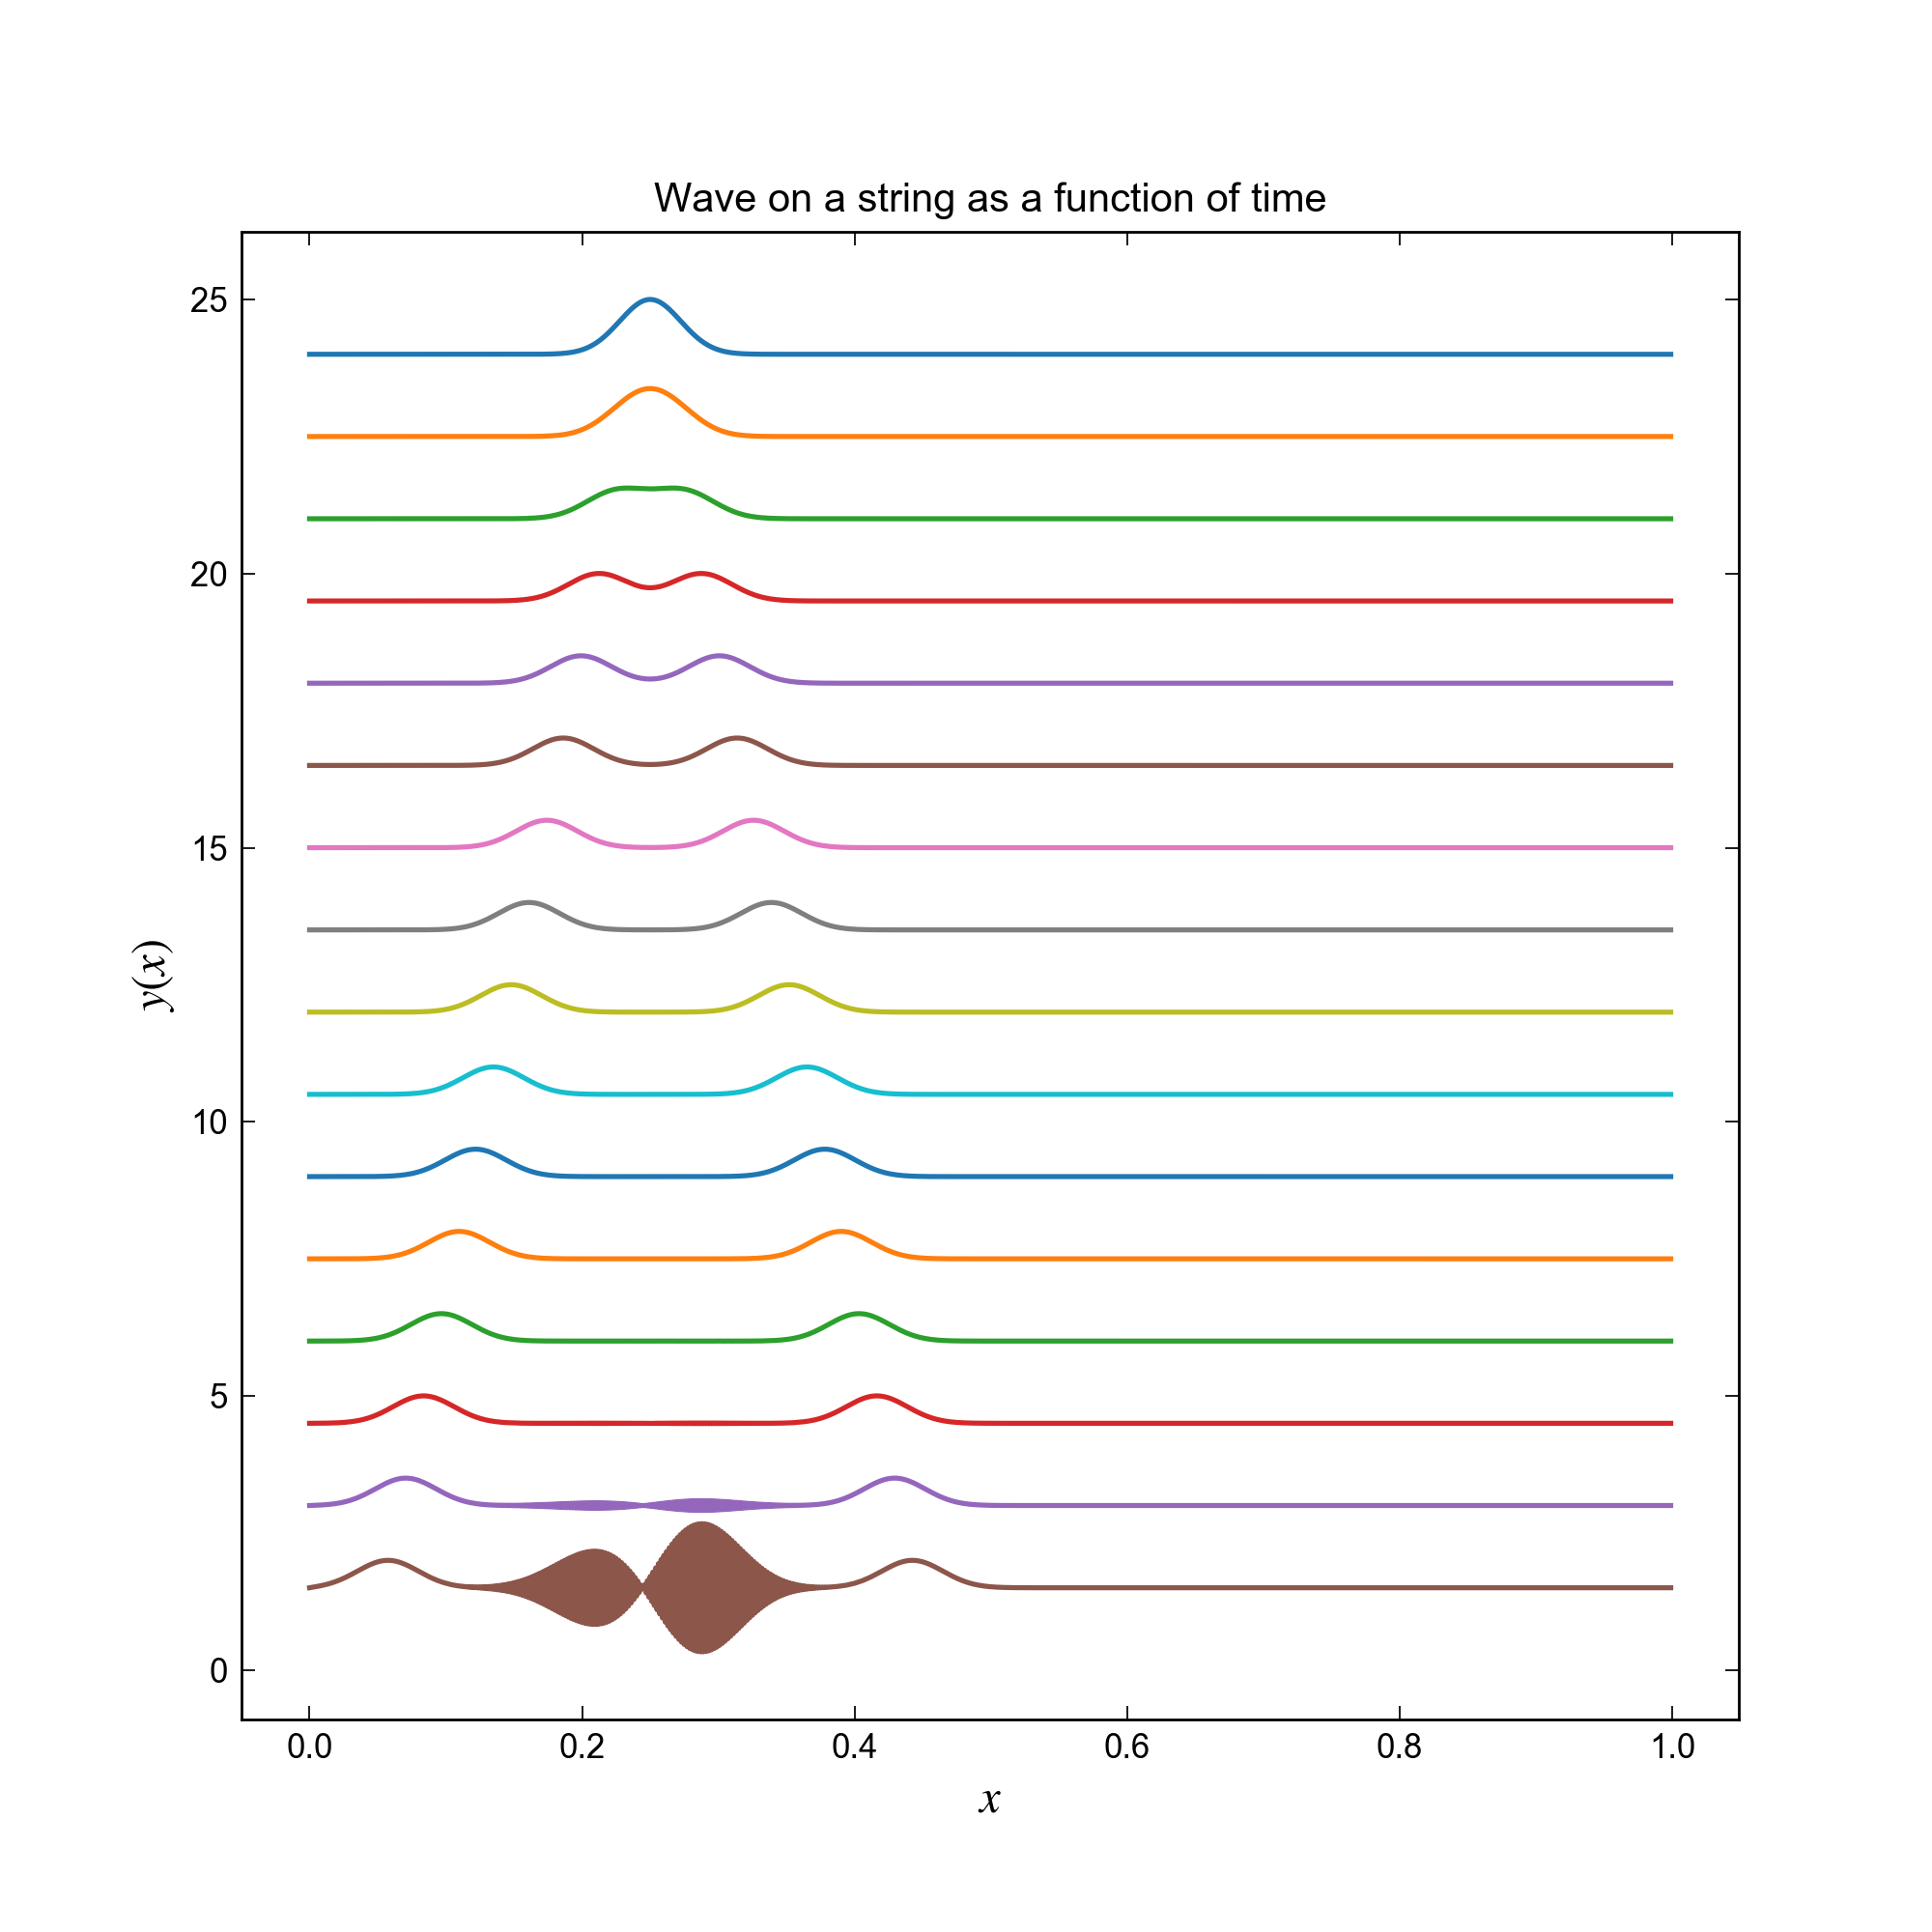

In [3]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.001
dt = 0.001005
#dt = 0.000995

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 205         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

y[:,0] = np.exp(-1000*(x - L/4.0)**2)
y[:,1] = np.exp(-1000*(x - L/4.0)**2)

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = 2*(1 - r*r)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n])
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string as a function of time')

<IPython.core.display.Javascript object>


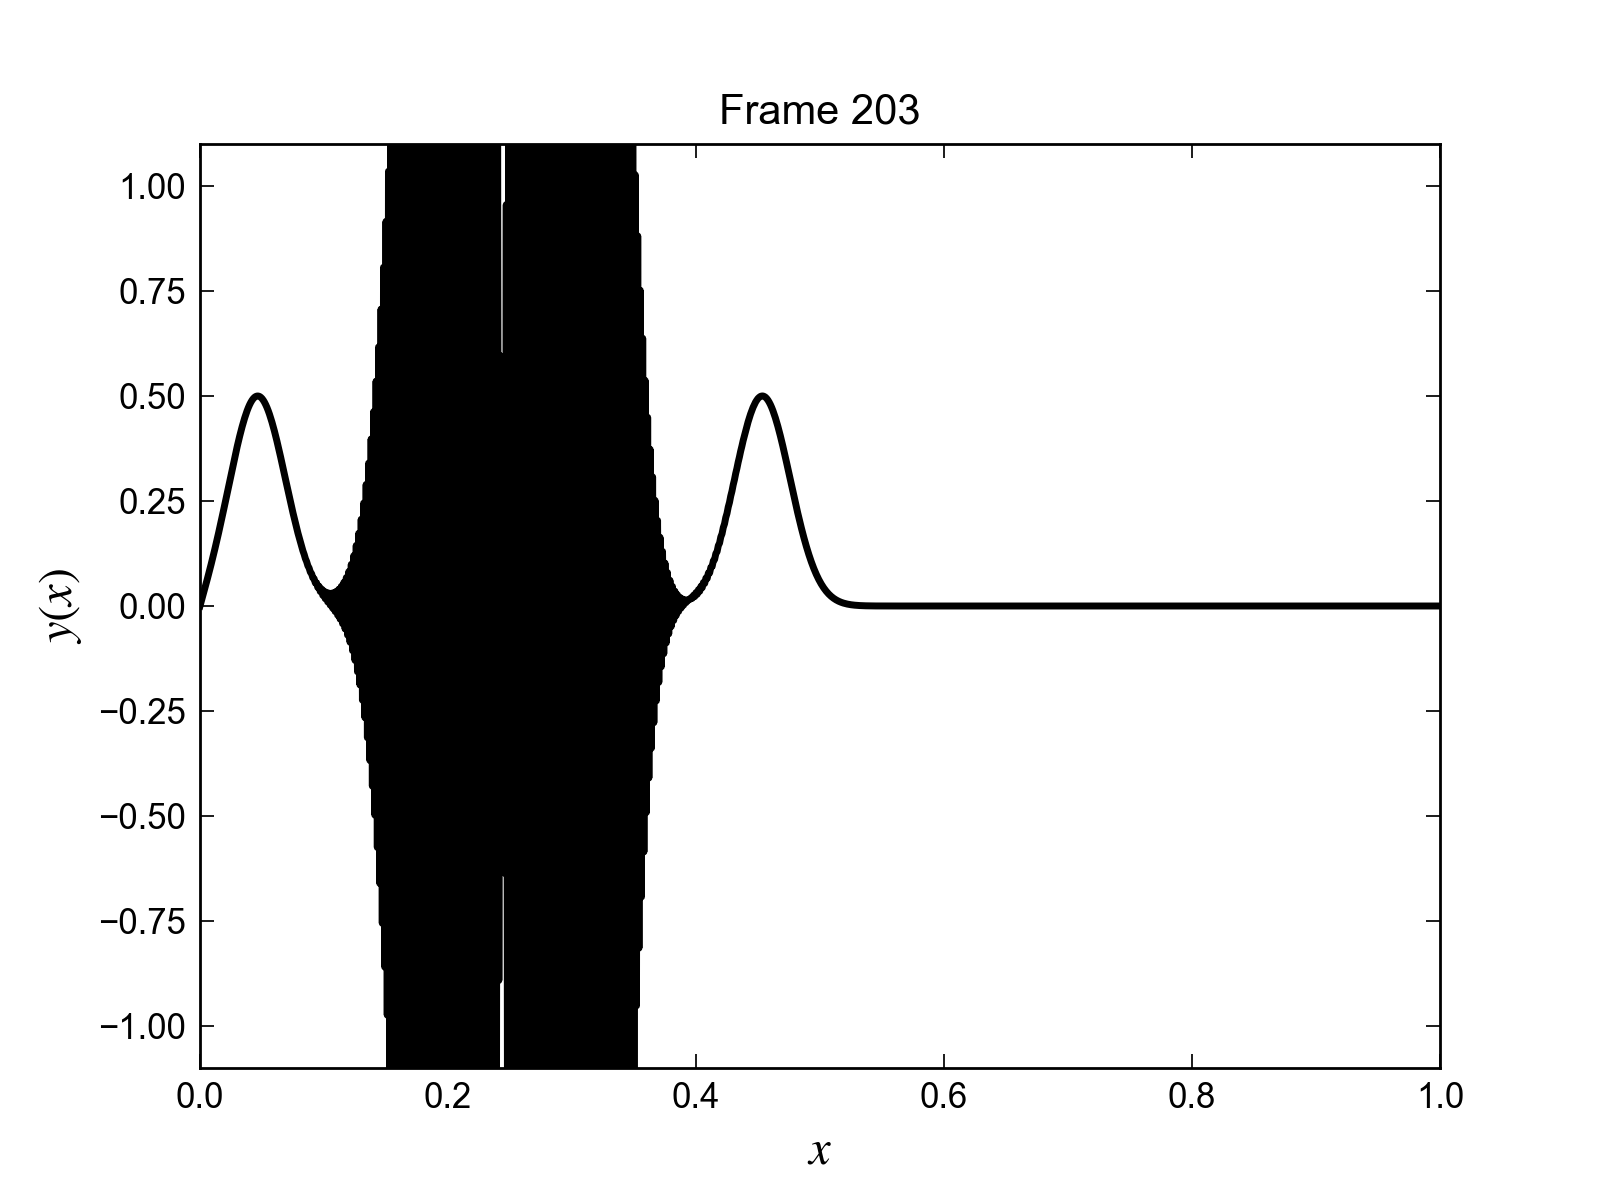

In [27]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(-1.1, 1.1))

# create a line object that will be animated
line = ax.plot(x, y[:, 0], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i])
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=4, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()

**Our numerical solution to the wave equation is only stable if $r \leq 1$, and is most accurate when $r=1$. **

## A more realistic pluck

<IPython.core.display.Javascript object>


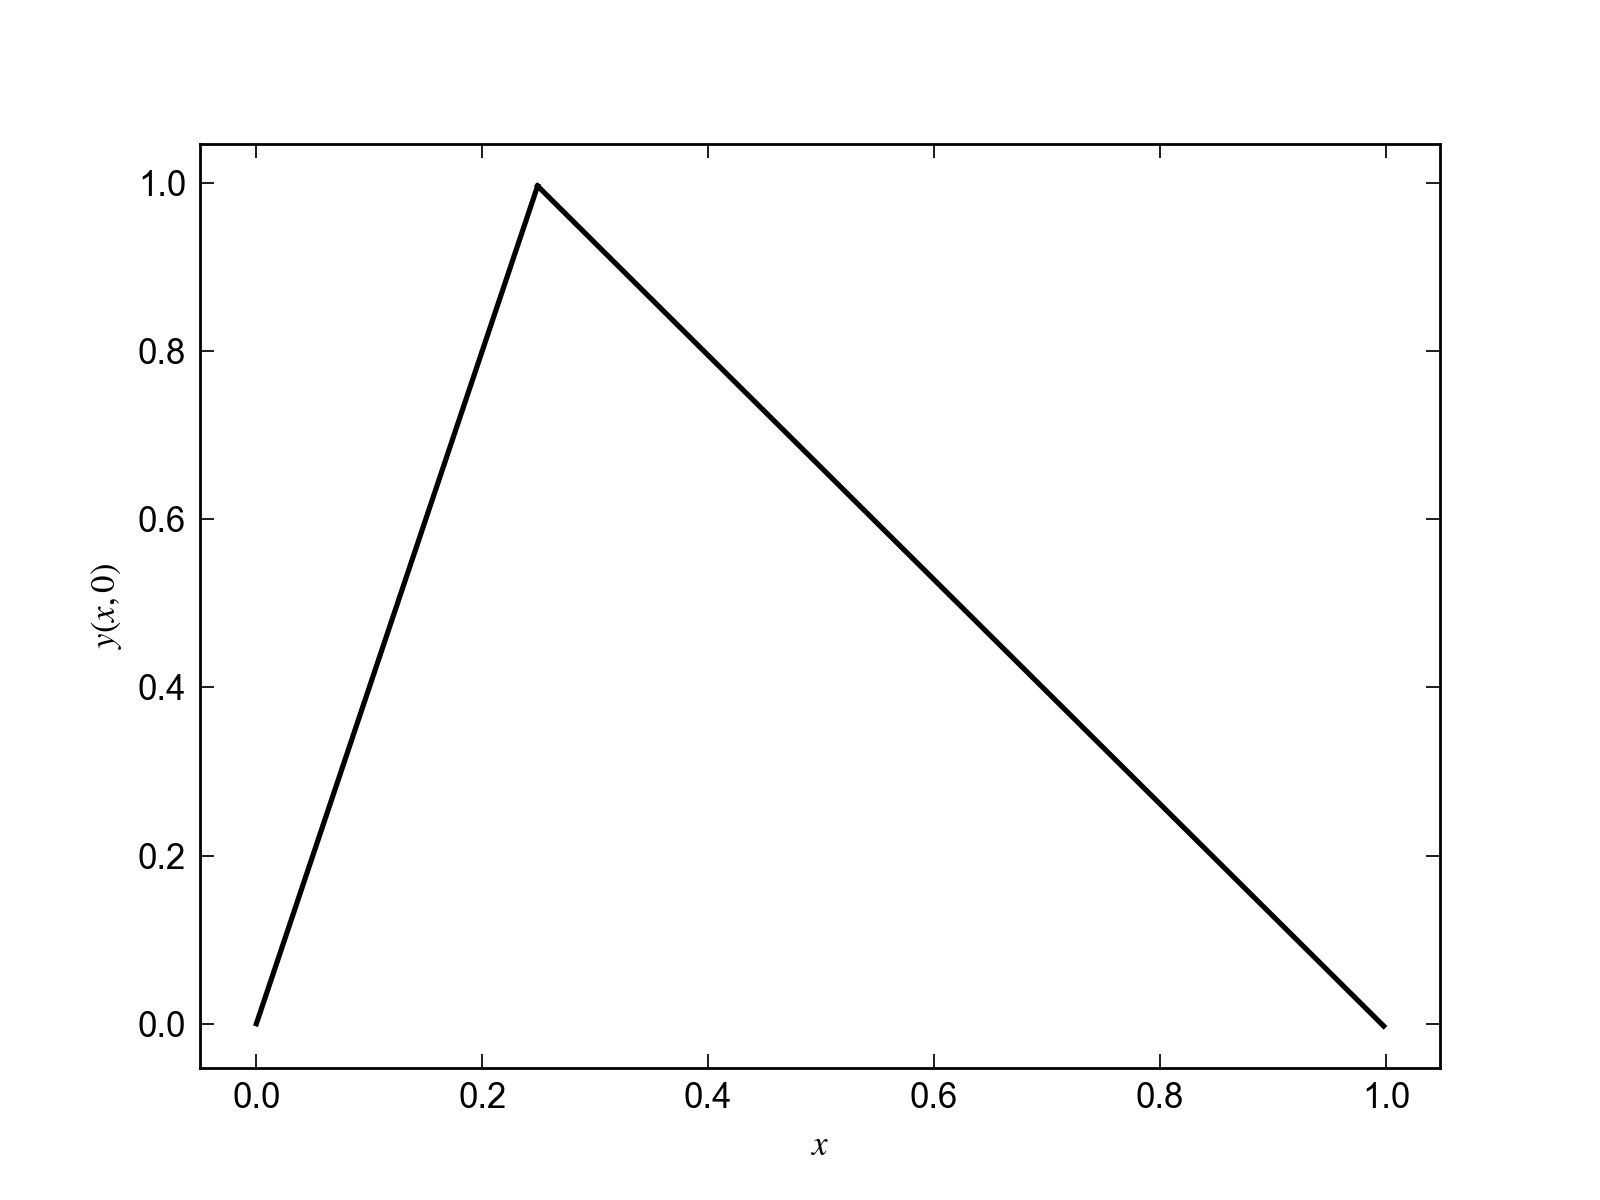

In [4]:
plt.figure()
x = np.arange(0,L,dx)
x1 = x[:len(x)//4]
x2 = x[:3*len(x)//4]
plt.plot(x1, 4*x1, 'k')
plt.plot(x2+x1[-1], -4*x2/3 + 4*x1[-1], 'k')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x,0)$')

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Modify your program to create an initial condition where the string's initial shape is similar to a guitar pluck. Make the initial condition so that $y(x,0) = 4x$ for $x=0\ldots \frac{L}{4}$ and $y(x,0) = \frac{-4x}{3} + y(\frac{L}{4},0)$ for $x=\frac{L}{4}\ldots L$.
</div>

<IPython.core.display.Javascript object>


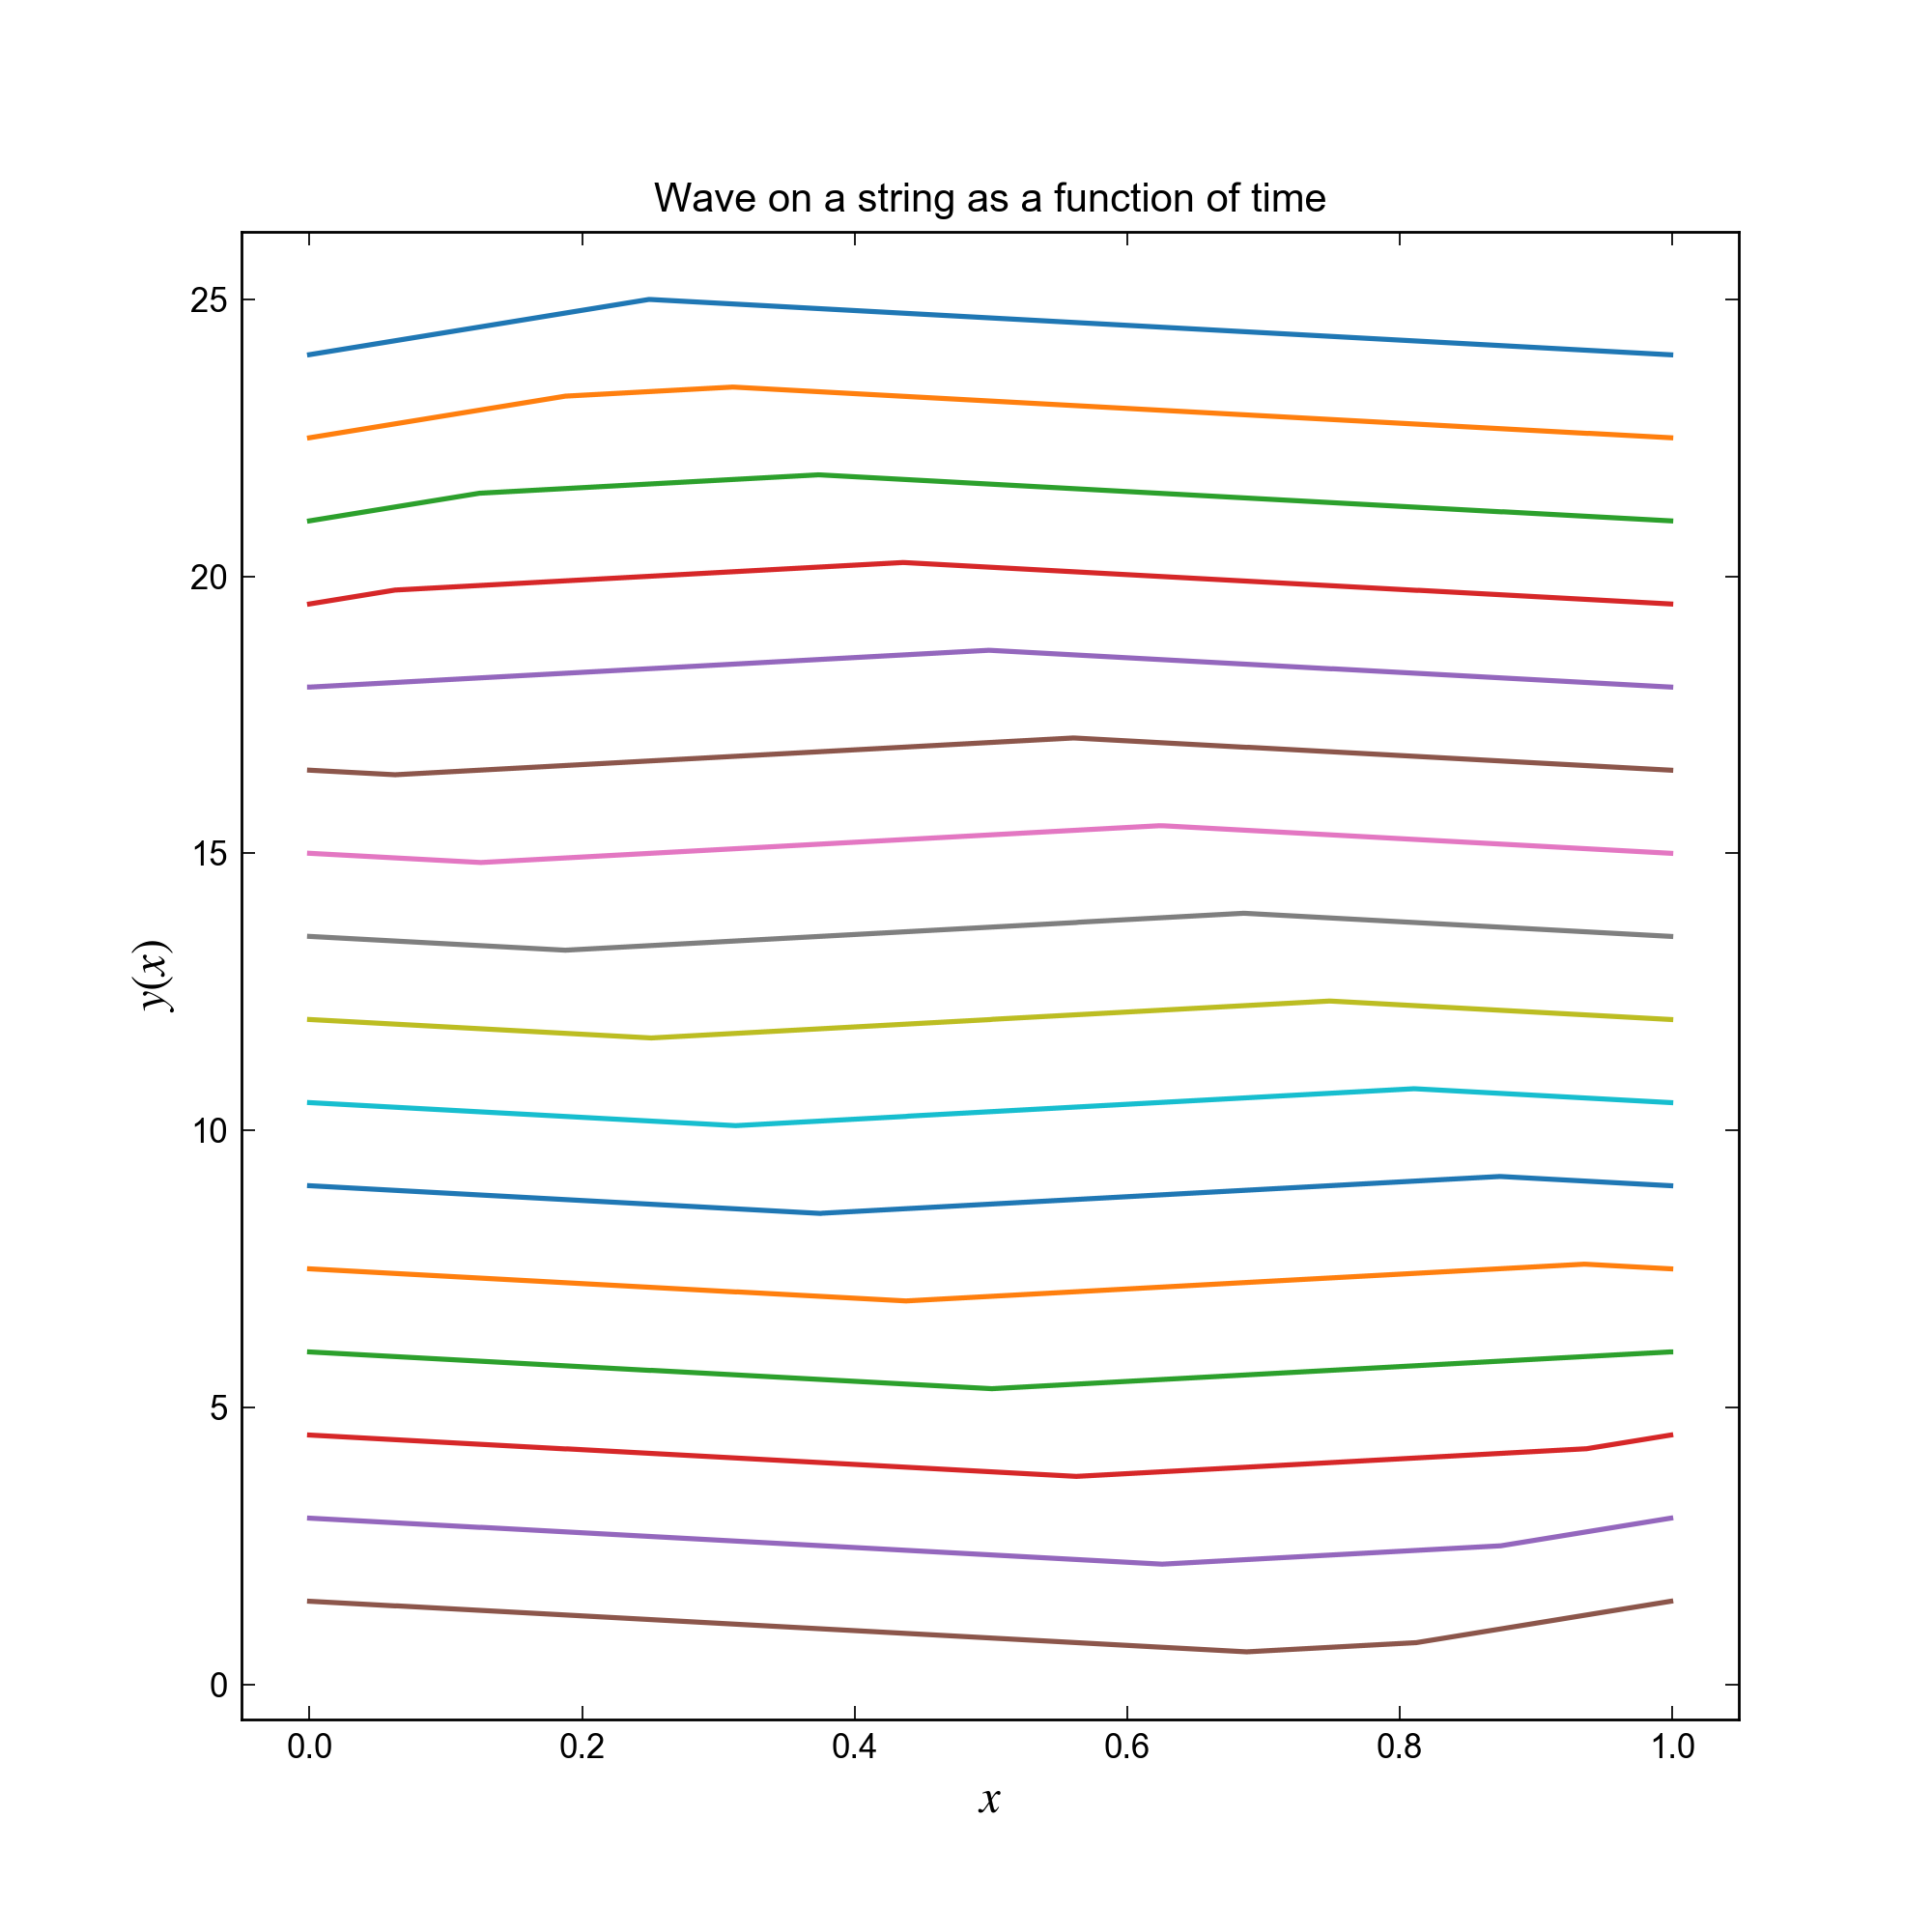

In [5]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.001
dt = 0.001

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 1000         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

for i in range(x_grid_size//4): 
    y[i,0] = 4*x[i]
    y[i,1] = 4*x[i]

for i in range(0,3*x_grid_size//4): 
    y[i+x_grid_size//4,0] = -4*x[i]/3 + y[x_grid_size//4-1,0]
    y[i+x_grid_size//4,1] = -4*x[i]/3 + y[x_grid_size//4-1,0]

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = 2*(1 - r*r)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n])
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string as a function of time')

<IPython.core.display.Javascript object>


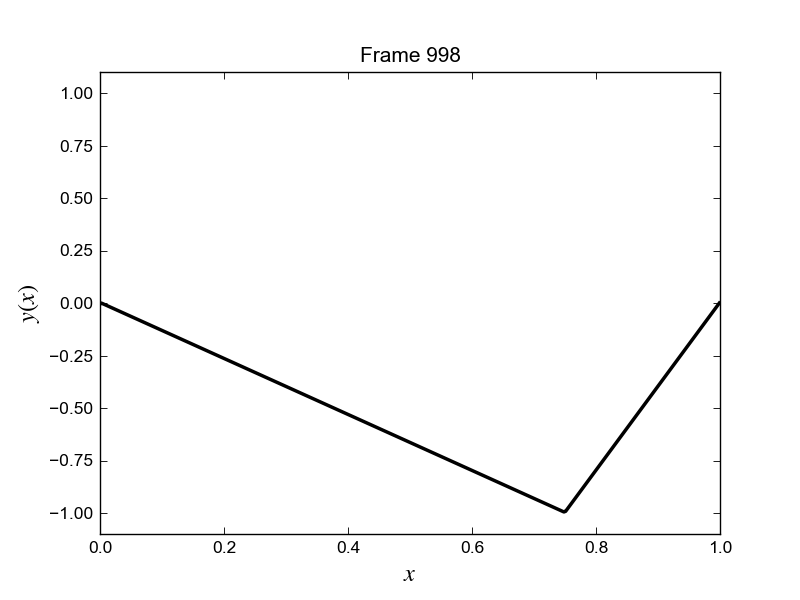

In [9]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(-1.1, 1.1))

# create a line object that will be animated
line = ax.plot(x, y[:, 0], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i])
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=2, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()

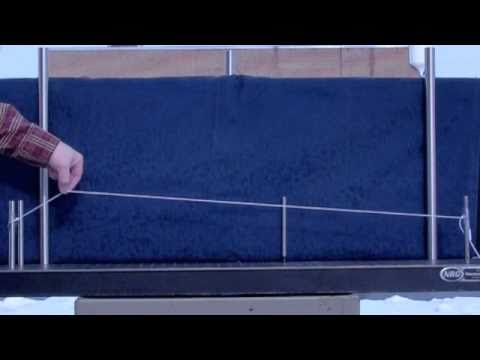

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('_X72on6CSL0', width=600, height=400)

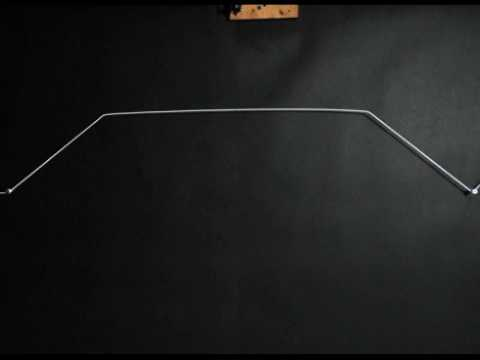

In [2]:
YouTubeVideo('Qr_rxqwc1jE', width=600, height=400)

## Adding friction to the wave equation

We can include the effect of friction in the wave equation by adding a frictional force that is proportional to the velocity of a given segment of the string

\begin{equation}
    F_f = -2\kappa \Delta x \frac{\partial y}{\partial t},
\end{equation}

where $\kappa$ is a constant proportional to the viscosity of the medium in which the string is vibrating. Adding this frictional term, our differential equation becomes

\begin{equation}
    \frac{\partial^2 y (x,t)}{\partial t^2} = c^2 \frac{\partial^2 y (x,t)}{\partial x^2} - \frac{2\kappa}{\mu}\frac{\partial y (x,t)}{\partial t}.
\end{equation}

Using finite difference equations, we obtain the following formula to compute the displacement of the string at later times:

\begin{equation}
    y(i, n+1) = \frac{1}{\left(1+\frac{2\kappa \Delta t}{\mu}\right)} 
                \left[ 2\left(1 + \frac{\kappa \Delta t}{\mu} \right) y(i,n) - y(i,n-1)
                + r^2 \left[y(i+1,n) + y(i-1,n) - 2y(i,n)\right] \right].
\end{equation}

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Modify your program to include the effects of friction for the simple "Gaussian pluck". Use values of $\mu = 1$ and $\kappa = 0.5$
</div>

<IPython.core.display.Javascript object>


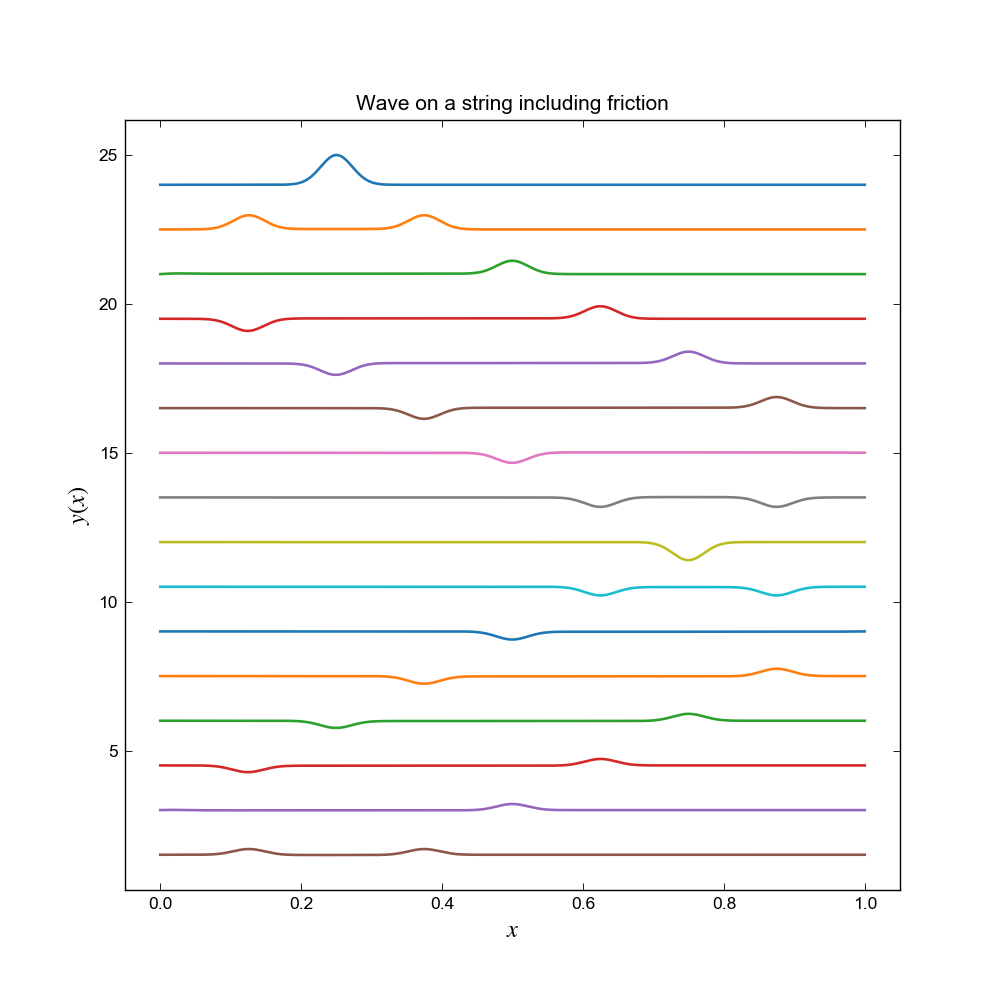

In [10]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.001
dt = 0.001
mu = 1
kappa = 0.5

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 2000         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

y[:,0] = np.exp(-1000*(x - L/4.0)**2)
y[:,1] = np.exp(-1000*(x - L/4.0)**2)

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = (2*(1 + kappa*dt/mu)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n] - 2*y[i,n]))/(1+2*kappa*dt/mu)
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string including friction')

## Animation

<IPython.core.display.Javascript object>


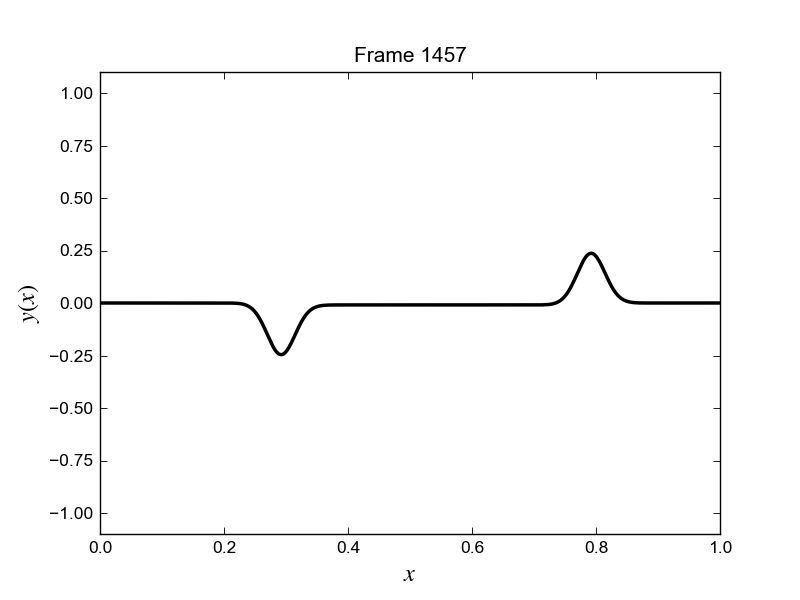

In [11]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(-1.1, 1.1))

# create a line object that will be animated
line = ax.plot(x, y[:, 0], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i])
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=2, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Modify your program to include the effects of friction for the more realistic pluck at the center. Use values of $\mu = 1$ and $\kappa = 0.5$
</div>

<IPython.core.display.Javascript object>


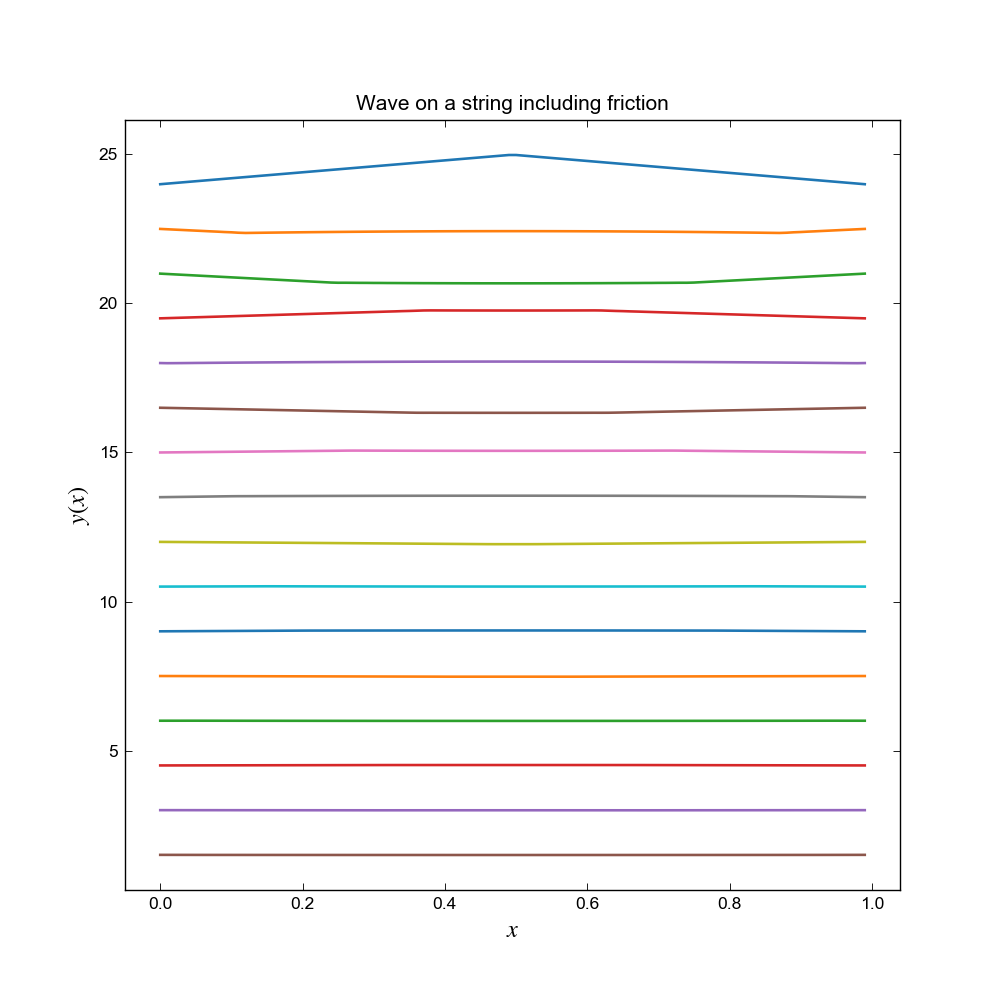

In [12]:
c = 1                 # wave velocity on string
L = 1.0               # string length
dx = 0.01
dt = 0.01
mu = 1
kappa = 0.5

x = np.arange(0, L, dx)
x_grid_size = len(x)

t_iter = 1000         # number of time iterations

r = c*dt/dx

y = np.zeros((x_grid_size, t_iter))  # string height at point x

for i in range(x_grid_size//2): 
    y[i,0] = 2*x[i]
    y[i,1] = 2*x[i]

for i in range(0,x_grid_size//2): 
    y[i+x_grid_size//2,0] = -2*x[i] + y[x_grid_size//2-1,0]
    y[i+x_grid_size//2,1] = -2*x[i] + y[x_grid_size//2-1,0]

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = (2*(1 + kappa*dt/mu)*y[i,n] - y[i,n-1] + r*r*(y[i+1,n] + y[i-1,n] - 2*y[i,n]))/(1+2*kappa*dt/mu)
        
Nlines = 16
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines]+(Nlines-i)*1.5)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a string including friction')

<IPython.core.display.Javascript object>


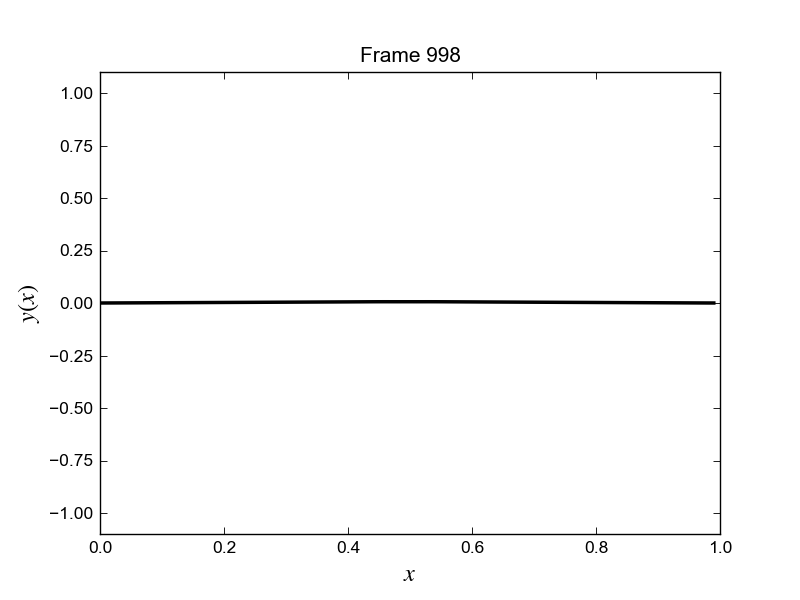

In [13]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(-1.1, 1.1))

# create a line object that will be animated
line = ax.plot(x, y[:, 0], color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i])
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=8, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()

## Waves on a catenary

A catenary is the idealized shape taken by a hanging string/chain under its own weight when it is only supported at the ends.

<img src="http://www.math.udel.edu/~pelesko/MECLab/StudentWork/Chain/Demo%20015.jpg" width=400px>

<img src="https://www.doublestonesteel.com/wp-content/uploads/2015/07/stlouisarch-photo-03.jpg" width=400px>

The equilibrium shape of a catenary is given by the formula $u(x) = D\cosh(x/D)$. The tension in a catenary is not constant along $x$ as we have assumed for the previous cases, and one can show that it is proportional to the equilibrium shape ([see here](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/CP21.html)):

\begin{equation}
    T(x) = \mu g u(x) = \mu g D \cosh\left(\frac{x}{D}\right) = T_0\cosh\left(\frac{x}{D}\right),
\end{equation}

where $g$ is the acceleration due to gravity.

The wave equation including friction and a non-constant tension is given by

\begin{align}
    \frac{\partial^2 y (x,t)}{\partial t^2} &= \frac{1}{\mu} \frac{\partial}{\partial x} \left( T(x) \frac{\partial y (x,t)}{\partial x} \right) - \frac{2\kappa}{\mu}\frac{\partial y (x,t)}{\partial t} \\
    \frac{\partial^2 y (x,t)}{\partial t^2} &= \frac{1}{\mu} \frac{\partial T(x)}{\partial x} \frac{\partial y (x,t)}{\partial x} + \frac{T(x)}{\mu} \frac{\partial^2 y (x,t)}{\partial x^2} - \frac{2\kappa}{\mu}\frac{\partial y (x,t)}{\partial t}.
\end{align}

Pluging in the equation for $T(x)$ we obtain

\begin{equation}
    \frac{\partial^2 y (x,t)}{\partial t^2} = \frac{T_0}{\mu D} \sinh\left(\frac{x}{D}\right) \frac{\partial y (x,t)}{\partial x} + \frac{T_0}{\mu} \cosh\left(\frac{x}{D}\right) \frac{\partial^2 y (x,t)}{\partial x^2} - \frac{2\kappa}{\mu}\frac{\partial y (x,t)}{\partial t}.
\end{equation}

Finally, using finite difference equations, we obtain the following formula to compute the displacement of the string at later times:

\begin{align}
    y(i,n+1) &= \left(\frac{1}{1 + \frac{2\kappa \Delta t}{\mu}}\right) \left[\frac{T_0(\Delta t)^2}{\mu D \Delta x}\sinh\left(\frac{x(i)}{D}\right)[y(i+1,n)-y(i,n)] \\
    + \frac{T_0(\Delta t)^2}{\mu (\Delta x)^2}\cosh\left(\frac{x(i)}{D}\right)[y(i+1,n)+y(i-1,n)-2y(i,n)] \\
    + 2\left(1+\frac{\kappa \Delta t}{mu}\right)y(i,n) - y(i,n-1) \right]
\end{align}

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Modify your program to include the effects of friction on a catenary for the more realistic pluck at the center. Use values of $\mu = 0.0001$ and $\kappa = 0.00005$
</div>

<IPython.core.display.Javascript object>


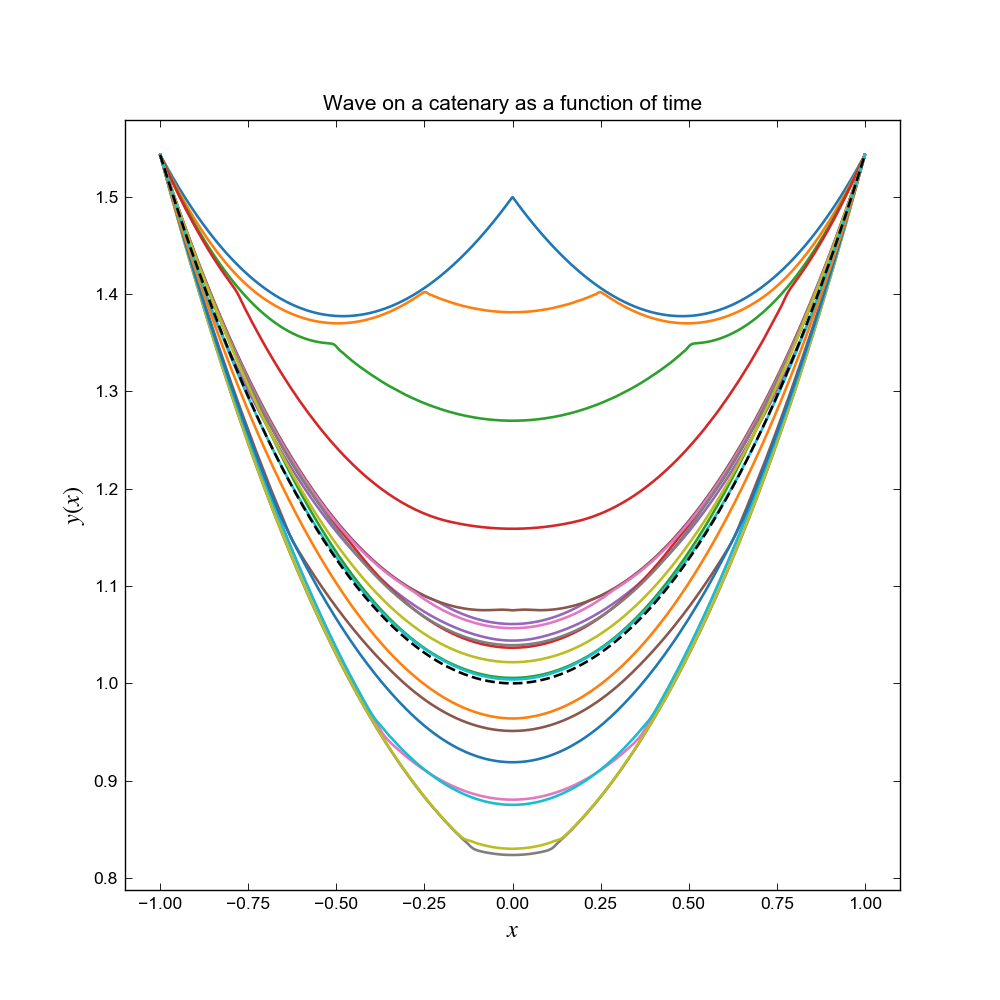

In [14]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

c = 1                 # wave velocity on string
L = 1.0               # string length
mu = 0.0001
#kappa = 0
kappa = 0.00005
D = 1
T0 = mu*D

x = np.linspace(-L,L,1000)
dx = x[1] - x[0]
dt = dx/2.0

x_grid_size = len(x)

t_iter = 5000         # number of time iterations

y = np.zeros((x_grid_size, t_iter))  # string height at point x

for i in range(x_grid_size//2): 
    y[i,0] = -(0.5/x[0])*x[i] + 0.5
    y[i,1] = -(0.5/x[0])*x[i] + 0.5

for i in range(x_grid_size//2,x_grid_size): 
    y[i,0] = (0.5/x[0])*x[i] + 0.5
    y[i,1] = (0.5/x[0])*x[i] + 0.5

for n in range(1, t_iter-1):
    for i in range(1, x_grid_size-1):
        y[i,n+1] = (T0*dt*dt*np.sinh(x[i]/D)*(y[i+1,n]-y[i,n])/(mu*D*dx)
                   +T0*dt*dt*np.cosh(x[i]/D)*(y[i+1,n]+y[i-1,n]-2*y[i,n])/(mu*dx*dx)
                   +2*(1+kappa*dt/mu)*y[i,n] - y[i,n-1])/(1+2*kappa*dt/mu)
        
Nlines = 20
        
plt.figure(figsize=(8, 8))
for i in range(Nlines):
    plt.plot(x, y[:,i*t_iter//Nlines] + D*np.cosh(x/D))

#for i in range(t_iter):
    #plt.plot(x, y[:,i] +D*np.cosh(x/D))
    #plt.plot(x, y[:,i])

#plt.plot(x,y[:,0]+D*np.cosh(x/D), 'k--')
plt.plot(x,D*np.cosh(x/D), 'k--')
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.title(r'Wave on a catenary as a function of time')

## Animation

<IPython.core.display.Javascript object>


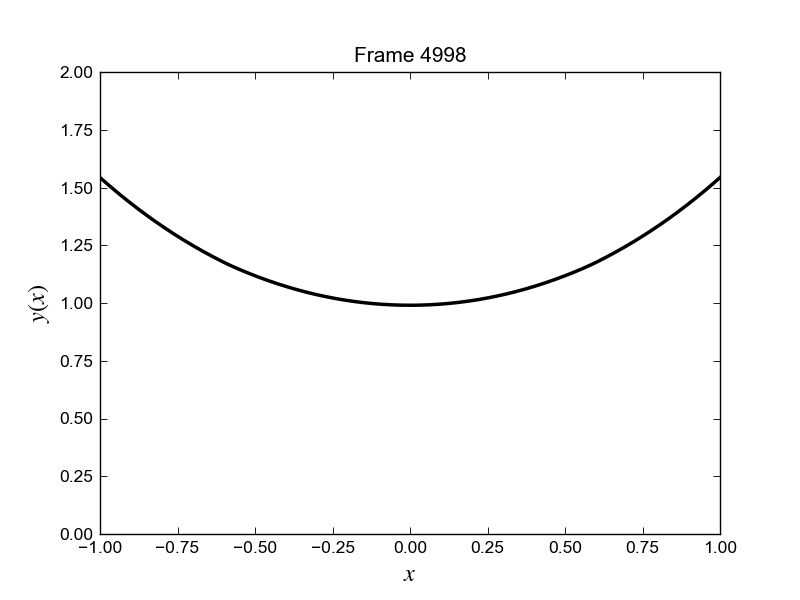

In [15]:
# set up the figure
fig, ax = plt.subplots()
ax.set(xlim=(-1, 1), ylim=(0, 2))

# create a line object that will be animated
line = ax.plot(x, y[:, 0] + D*np.cosh(x/D), color='k', lw=2)[0]

# function to update the y data of the line to be animated
def animate(i):
    line.set_ydata(y[:, i] + D*np.cosh(x/D))
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=1, frames=t_iter-1, repeat=False)

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y(x)$', fontsize=14)
plt.draw()
plt.show()